### DSC-680 Applied Data Science
### Varsha Tomar
### Project 1 : Milestone 2

In [1]:
# Importing important modules to perform data cleaning and analysis
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Step 1. Data Cleaning

In [2]:
# import the data
df = pd.read_csv('glassdoor_jobs.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [3]:
# find number of rows and columns
df.shape

(956, 15)

In [4]:
# drop 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          956 non-null    object 
 1   Salary Estimate    956 non-null    object 
 2   Job Description    956 non-null    object 
 3   Rating             956 non-null    float64
 4   Company Name       956 non-null    object 
 5   Location           956 non-null    object 
 6   Headquarters       956 non-null    object 
 7   Size               956 non-null    object 
 8   Founded            956 non-null    int64  
 9   Type of ownership  956 non-null    object 
 10  Industry           956 non-null    object 
 11  Sector             956 non-null    object 
 12  Revenue            956 non-null    object 
 13  Competitors        956 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 104.7+ KB


#### Observation:
There are a total of 2 numerical and 12 categorical columns in our dataframe.

In [6]:
# create a new column that can tag if salary estimate is in 'per hour'
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in
                                         x.lower() else 0)
df.hourly.value_counts()  

0    932
1     24
Name: hourly, dtype: int64

#### Observation:
There are 932 entires that have salary on per annum and 24 salaries are per hour. I created this column so that it can be used as a refrence to convert per hour to per annum

In [7]:
# remove any row that has 'Salary Estimate' of -1
df = df[df['Salary Estimate'] != '-1']

In [8]:
df.shape

(742, 15)

#### Observation:
Since our final model will be to train to predict salary of a data scientist, I removed all rows with outliers (-1) in 'Salary Estimate' column. The processed dataframe has 742 rows and 15 columns

In [9]:
# create new columns with minimum salary, maximum salary, and averaged salary
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

remove_kd = salary.apply(lambda x: x.lower().replace('per hour', '').replace
                         ('employer provided salary:', ''))

min_hr = remove_kd.apply(lambda x: x.lower().replace("k",'').replace('$',''))

# get the minimum, maximum and averaged salary
df['min_salary'] = min_hr.apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = min_hr.apply(lambda x: int(x.split('-')[1]))
df['average_salary'] = (df.min_salary + df.max_salary)/2

In [10]:
# get the company name cleaned
df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] < 0 
                             else x['Company Name'][:-3], axis=1)
df['company_txt'] = df['company_txt'].apply(lambda x: 
                                             x.replace('<','').replace('>',''))
df['company_txt'] = df['company_txt'].apply(lambda x: x.split('\n')[0])

In [11]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,min_salary,max_salary,average_salary,company_txt
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,53,91,72.0,Tecolote Research
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,63,112,87.5,University of Maryland Medical System
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,80,90,85.0,KnowBe4
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,56,97,76.5,PNNL
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,86,143,114.5,Affinity Solutions


In [12]:
# state field
df['job_state'] = df['Location'].apply(lambda x: x.split(', ')[1])
df.job_state.value_counts()

CA             151
MA             103
NY              72
VA              41
IL              40
MD              35
PA              33
TX              28
WA              21
NC              21
NJ              17
FL              16
OH              14
TN              13
DC              11
CO              11
WI              10
IN              10
UT              10
AZ               9
MO               9
AL               8
GA               6
KY               6
DE               6
MI               6
CT               5
IA               5
LA               4
OR               4
NE               4
NM               3
KS               3
ID               2
MN               2
Los Angeles      1
RI               1
SC               1
Name: job_state, dtype: int64

#### Observation:
There is one value 'Los Angeles' that need to be converted to 'CA'

In [13]:
df['job_state'] = df['job_state'].apply(lambda x: 'CA' if x == 'Los Angeles' else x)
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

#### Observation:
CA, MA, and NY are states with highest 'Data Scientist' job listings on Glass Door

In [14]:
# age of the company
df['company_age'] = df['Founded'].apply(lambda x: 0 if x < 1 else
                                        2023-x)
df.head(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,min_salary,max_salary,average_salary,company_txt,job_state,company_age
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,53,91,72.0,Tecolote Research,NM,50
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,63,112,87.5,University of Maryland Medical System,MD,39
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,80,90,85.0,KnowBe4,FL,13
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,56,97,76.5,PNNL,WA,58
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,86,143,114.5,Affinity Solutions,NY,25
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",0,71,119,95.0,CyrusOne,TX,23
6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1,0,54,93,73.5,ClearOne Advantage,MD,15
7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1,0,86,142,114.0,Logic20/20,CA,18
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1,0,38,84,61.0,Rochester Regional Health,NY,9
9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel",0,120,160,140.0,intent,NY,14


In [15]:
df['Job Description'][0]

'Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences.\nSkills Required:\nBachelor’s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years’ experience credit for Master’s degree; five years’ experience credit for a Ph.D\nApplicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoint, Excel, and working knowledge of MS Access, LMS, SAS, data visualization tools, and have a strong algorithmic aptitude\nExcellent verbal and written communication skills, and quantitative analytical skills are required\nApplicant must be able to work in a team environment\nU.S. citizenship and ability to obtain a DoD Secret Clearance required\nResponsibilities: The applicant will be responsible for formulating analytical solutions to complex data problems; creating data analytic models to improve data

#### Observation:
I printed the first entry of the job description so that I can get some keywords and determine how many job descriptions have these keywords

In [16]:
df['python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['python'].value_counts()

1    392
0    350
Name: python, dtype: int64

#### Observation:
The keyword 'python' are present in 392 job descriptions shows these jobs have 'python' as requirement.

In [17]:
df['Power_BI'] = df['Job Description'].apply(lambda x: 1 if 'power bi' in x.lower() else 0)
df['Power_BI'].value_counts()

0    708
1     34
Name: Power_BI, dtype: int64

#### Observation:
Only 34 job descriptions have 'Power BI' in their job description.

In [18]:
df['Tableau'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
df['Tableau'].value_counts()

0    594
1    148
Name: Tableau, dtype: int64

#### Observation:
Only 148 job descriptions have 'Tableau' in their job description.

In [19]:
df['MATLAB'] = df['Job Description'].apply(lambda x: 1 if 'matlab' in x.lower() else 0)
df['MATLAB'].value_counts()

0    687
1     55
Name: MATLAB, dtype: int64

#### Observation:
Only 55 job descriptions have 'MATLAB' in their job description.

In [20]:
#r studio 
df['R_studio'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
df.R_studio.value_counts()

0    740
1      2
Name: R_studio, dtype: int64

#### Observation:
This is very surprising finding. Just 2 job descriptions have 'R Studio' in their job description. May be job description has 'R' and only single letter is hard to fish as every other data will have a single R and may give false error. So, I am going to stick with 'R-Studio' for this analysis.

In [21]:
#spark 
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df.spark.value_counts()

0    575
1    167
Name: spark, dtype: int64

#### Observation:
Only 167 job descriptions have 'spark' in their job description.

In [22]:
#aws 
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df.aws.value_counts()

0    566
1    176
Name: aws, dtype: int64

#### Observation:
Only 176 job descriptions have 'aws' in their job description.

In [23]:
#excel
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df.excel.value_counts()

1    388
0    354
Name: excel, dtype: int64

#### Observation:
354 job descriptions have 'Excel' in their job description. It appears that 'Python' and 'Excel' are in high demand for 'Data Scientist' jobs.

In [24]:
# immigration
df['immigration'] = df['Job Description'].apply(lambda x: 1 if 'citizenship' in x.lower() else 0)
df['immigration'].value_counts()

0    657
1     85
Name: immigration, dtype: int64

#### Observation:
This is interesting that 85 job description specifically has the citizenship requirement. I assume these jobs are highly restricted jobs like in defense and national security.

In [25]:
def education(text):
    """This function will return highest degree requirement given in a job description.
    """
    phd = ''
    ms = ''
    bs = ''
    if 'phd' in text.lower() or 'ph.d.' in text.lower() or 'ph.d' in text.lower():
        phd = True
    if 'master' in text.lower() or 'm.s.' in text.lower() or 'm.s' in text.lower():
        ms = True
    if 'bachelor' in text.lower() or 'b.s.' in text.lower() or 'b.s' in text.lower():
        bs = True
        
        
    if (phd and ms and bs) or (phd and ms) or (phd and bs) or phd:
        return 'Ph.D.'
    elif (ms and bs) or ms:
        return 'M.S.'
    elif bs:
        return 'B.S.'
    else:
        return 'na'
    

In [26]:
df['highest_edu_req'] = df['Job Description'].apply(education)
df['highest_edu_req'].value_counts()

Ph.D.    203
na       190
B.S.     183
M.S.     166
Name: highest_edu_req, dtype: int64

#### Observation:
Interestingly, Ph.D. top the chart for the educational requirement. However, while looking at the job descriptions, the experience can fill the gap in the degrees.

In [27]:
def title_simplifier(title):
    """This function convert different job titles into a single title identifier.
    """
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [28]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

#### Observations:
The highest number of jobs are for data scientists. Directors are low in number, ofcourse they are very high responsibility and upper-level job.

In [29]:
def seniority(title):
    """This function identifies if the job for senior or junior level. This indirectly indicates the number of 
    years of experience.
    """
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [30]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

#### Observations:
Seems like senior level jobs are high. I assume 'na' have reserved the title level as they can go either way based 
on the candidates they find for the specific job. So, though junior level jobs seems too low, they might be overlapped with senior level jobs in the category 'na'.

In [31]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len'][:10]

0    2536
1    4783
2    3461
3    3883
4    2728
5    3747
6    1786
7    3804
8    1538
9    4574
Name: desc_len, dtype: int64

#### Observations:
The idea behind to make this new column 'desc_len' was to get the total length of the job description and use this column during EDA to identify how the company's age or requirement or competitors match with the job length.

In [32]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [33]:
df[df.hourly ==1][['hourly','min_salary','max_salary', 'average_salary']]

,hourly,min_salary,max_salary,average_salary
197,1,17,24,20.5
209,1,21,34,27.5
240,1,18,25,21.5
247,1,21,34,27.5
257,1,15,25,20.0
307,1,17,24,20.5
337,1,21,34,27.5
427,1,18,25,21.5
437,1,24,39,31.5
456,1,21,34,27.5


#### Observations:

There were company's that had provided the salary wages in per hour basis. I wished to normalize per hour to per annum salary. In the next cell, I am converting the hourly wages to annual salary.

In [34]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)
df['average_salary'] = df.apply(lambda x: x.average_salary*2 if x.hourly ==1 else x.average_salary, axis =1)

In [35]:
df[df.hourly ==1][['hourly','min_salary','max_salary','average_salary']]

,hourly,min_salary,max_salary,average_salary
197,1,34,48,41.0
209,1,42,68,55.0
240,1,36,50,43.0
247,1,42,68,55.0
257,1,30,50,40.0
307,1,34,48,41.0
337,1,42,68,55.0
427,1,36,50,43.0
437,1,48,78,63.0
456,1,42,68,55.0


#### Observations:
The minimum, maximum and average salaries were normalized to annual based salary.

In [36]:
df.shape

(742, 35)

In [37]:
# This will give information about numerical variables
df.describe()

,Rating,Founded,hourly,min_salary,max_salary,average_salary,company_age,python,Power_BI,Tableau,MATLAB,R_studio,spark,aws,excel,immigration,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,74.719677,128.149596,101.434636,49.456873,0.528302,0.045822,0.199461,0.074124,0.002695,0.225067,0.237197,0.522911,0.114555,3869.545822,1.053908
std,0.801210,497.183763,0.177034,30.980593,45.220324,37.546122,53.900445,0.499535,0.209240,0.399865,0.262149,0.051882,0.417908,0.425651,0.499812,0.318699,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,15.000000,16.000000,15.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,52.000000,96.000000,73.500000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,69.500000,124.000000,97.500000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,91.000000,155.000000,122.500000,62.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,202.000000,306.000000,254.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [38]:
# This gives information on the entire data sets.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 955
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  min_salary         742 non-null    int64  
 16  max_salary         742 non

#### Observation:
There are 2 columns with float values, 16 columns have integers and 17 are categorical columns. Since there are none 'None' value, we can dive into EDA of this data.

## Step 2. Exploratory Data Analysis (EDA)

#### EDA of numerical variables

In [39]:
def hist_plot(df, column_name, title, xlabel):
    """ Function to plot histogram of interesting numerical variables.
    """
    font1={'color':  'black', 'weight': 'bold'} 
    font2={'color':  'black', 'weight': 'normal'}
    df[column_name].hist()
    plt.title(f'Histogram of {title}', fontdict=font1)
    plt.xlabel(xlabel, fontdict=font2)
    plt.ylabel('Frequency', fontdict=font2)
    plt.show()   

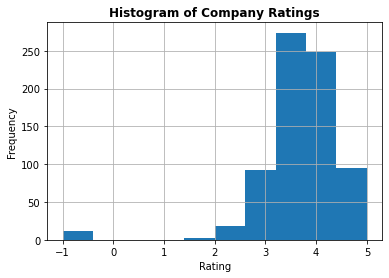

In [40]:
hist_plot(df, 'Rating', 'Company Ratings', 'Rating')

#### Observations:
1. '-1' rating is outliers that says these many companies doesn't have ratings on Glassdoor.
2. The rating hist follows a normal distribution where the peak is between 3 and 4 rating. Therefore, most of the job-posting companies have an above average rating.

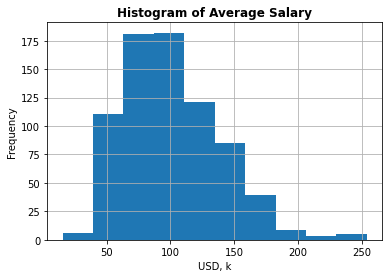

In [41]:
hist_plot(df, 'average_salary', 'Average Salary', 'USD, k')

#### Observation:
1. The histogram for average salary seems to be right-skewed distribution, which suggests that most salaries of data scientist in the group are tilted towards lower salary range.
2. Average salary appears to be a broader range - anywhere between USD 60k - USD 110k.

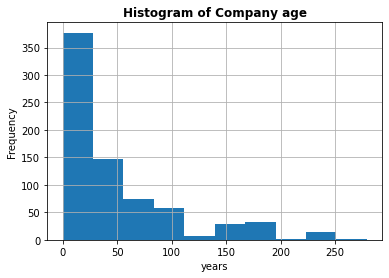

In [42]:
hist_plot(df, 'company_age', 'Company age', 'years')

#### Observations:
1. The histogram for company age shows an exponetial decreasing frequecies with years.
2. Most of the hiring companies appear to be new with company's age anywere between 0 to 25 years.
3. Interestingly, there are companies with age of 250 years and above.

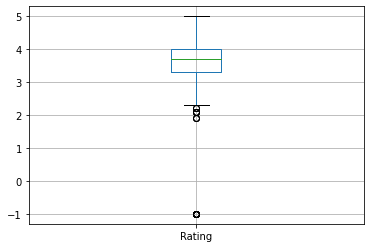

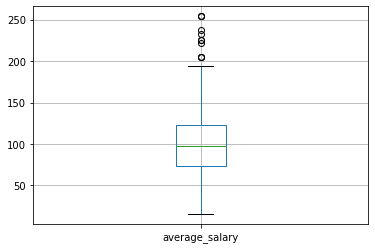

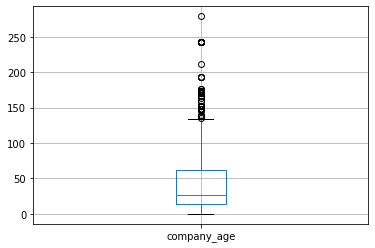

In [43]:
for i, value in enumerate(['Rating', 'average_salary', 'company_age']):
    plt.figure(i)
    df.boxplot(column=value)
plt.show()

#### Observations:
To identify any outliers in above plotted histogram, I plotted box-plots.
1. Ratings have otliers below ~ 2.5 rating. Therefore, the range of rated companies shall be considered anywhere between 2.5 to 5, and thus our conclusion made during 'Ratings' hist analysis that most of the hiring companies have an above average rating, which is certainly an advantage for a job seeker.
2. Average Salary have outiliers above 200k. These salary might be for a few that have high-level vacancies for a data-scientist.
3. As I have discussed in 'Company age' hist that there are certain company as old as 250 years, seems might be outliers companies in the box plot. As per box plot for company's age, any company with above 130 years is an outlier.

#### Finding the correlation among the variables

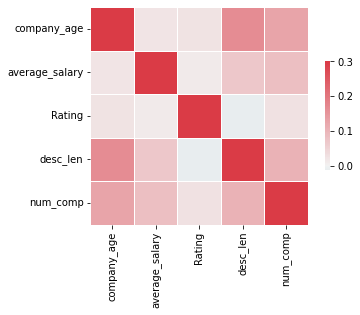

In [44]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['company_age','average_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### Observations:
1. Company age is strongly realted with job description length and number of competitors.
2. Average salary is also related with job description length and number of competitors.

#### EDA of categorical variables

In [45]:
# Getting values of categorical varibales into a new dataframe.
df_categorical = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 
                     'company_txt', 'job_state','python', 'Power_BI', 'Tableau', 'MATLAB',
                     'R_studio', 'spark', 'aws', 'excel', 'immigration', 'highest_edu_req',
                     'job_simp', 'seniority']]

1. Bar plot for Location: total = 200


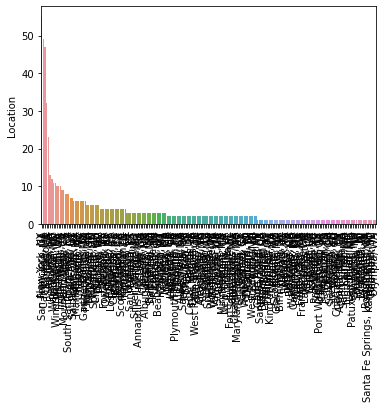

2. Bar plot for Headquarters: total = 198


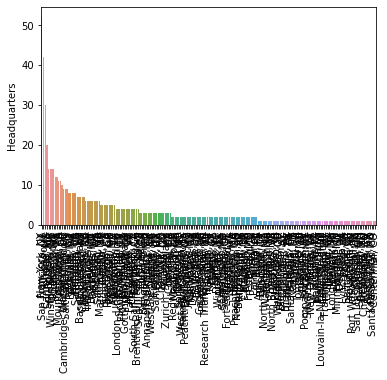

3. Bar plot for Size: total = 9


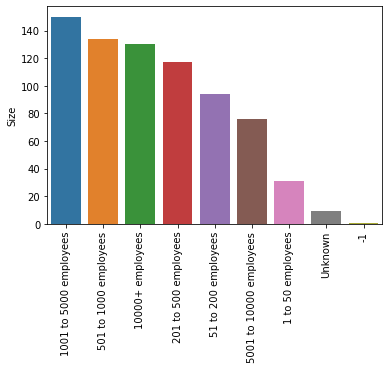

4. Bar plot for Type of ownership: total = 11


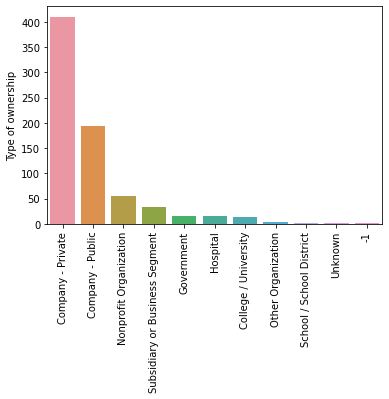

5. Bar plot for Industry: total = 60


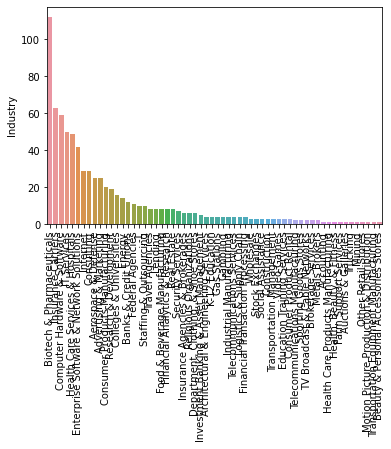

6. Bar plot for Sector: total = 25


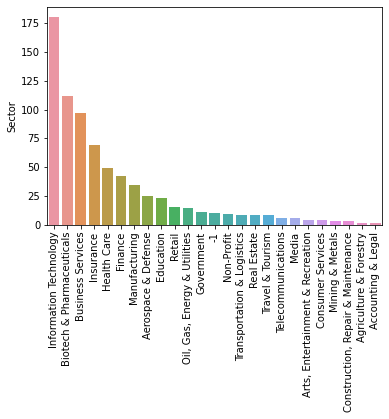

7. Bar plot for Revenue: total = 14


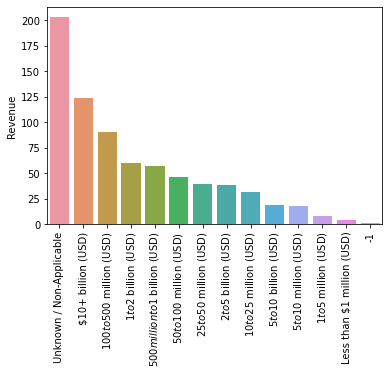

8. Bar plot for company_txt: total = 343


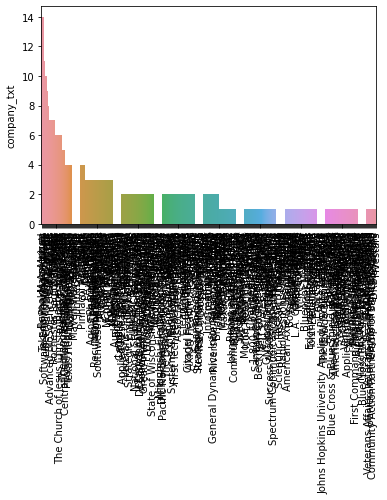

9. Bar plot for job_state: total = 37


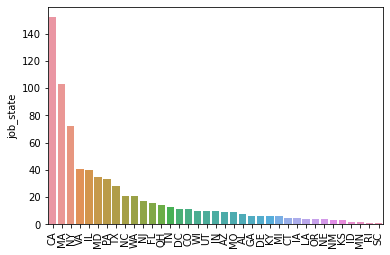

10. Bar plot for python: total = 2


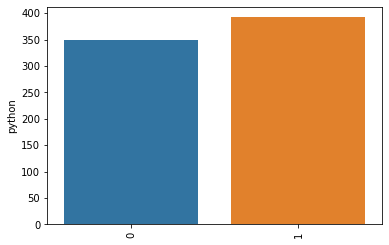

11. Bar plot for Power_BI: total = 2


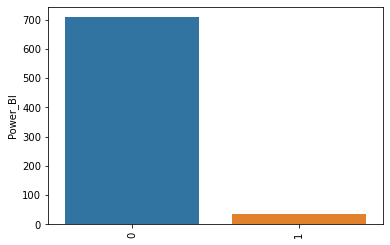

12. Bar plot for Tableau: total = 2


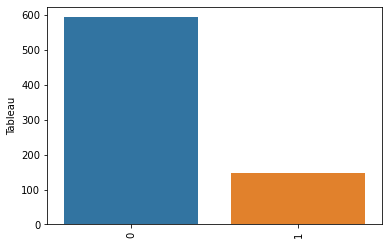

13. Bar plot for MATLAB: total = 2


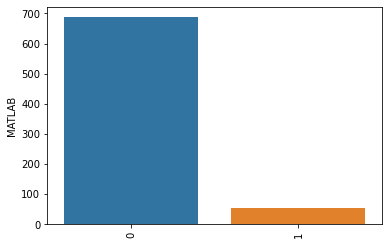

14. Bar plot for R_studio: total = 2


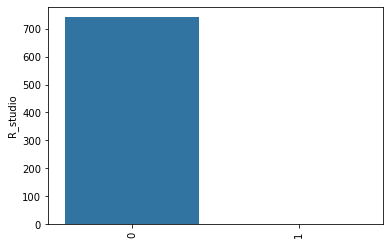

15. Bar plot for spark: total = 2


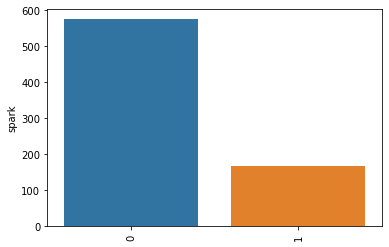

16. Bar plot for aws: total = 2


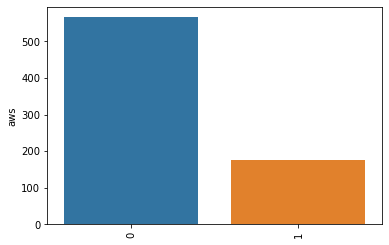

17. Bar plot for excel: total = 2


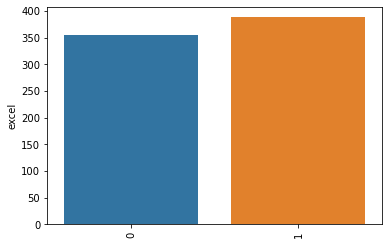

18. Bar plot for immigration: total = 2


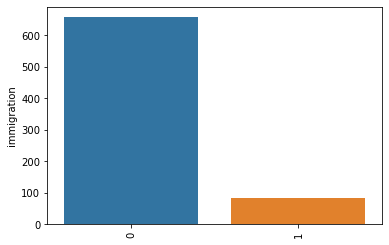

19. Bar plot for highest_edu_req: total = 4


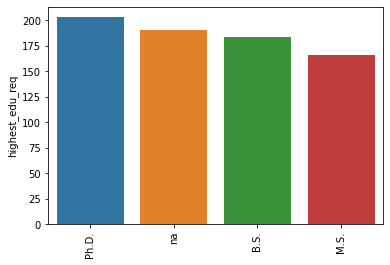

20. Bar plot for job_simp: total = 7


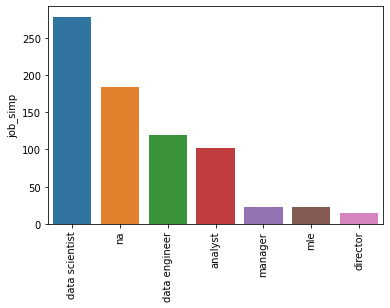

21. Bar plot for seniority: total = 3


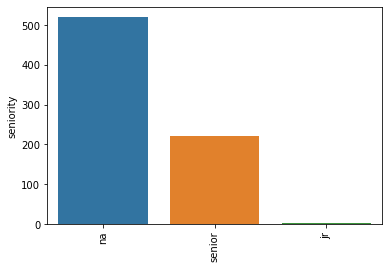

In [46]:
for i, value in enumerate(df_categorical.columns):
    cat_num = df_categorical[value].value_counts()
    print(f"{i+1}. Bar plot for {value}: total = {len(cat_num)}")
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

#### Observations:
1.	Bar plot for ‘Location’ is cluttered. I will work on top 10 values of Locations in the next cell.
2.	Like ‘Location’, ‘Headquarters’ is cluttered as well. I will work on the top 10 values of ‘Headquarters’ in the next cell as well.
3.	The highest no. of hiring companies have employees between 1001 to 5000 employees.
4.	Privately owned companies are hiring most of the data scientists then other type of company ownership.
5.	In industry ownership, top three companies hiring data scientists include ‘Biotech & Pharmaceuticals’, ‘Insurance’ and ‘Computer hardware’.
6.	In case of sector, ‘Information Technology’, ‘Biotech & Pharmaceuticals’ and ‘Business services’ top the chart.
7.	The hiring companies that are gaining revenue above USD 10 billion tops the ‘Revenue’ bar chart.
8.	Like ‘Location’ and ‘Headquarters’, company name is cluttered too. I will display top 10 in next cell.
9.	Top three states where the data scientist job hiring companies includes ‘CA’, ‘MA’, and ‘NY’.
10.	The hiring companies that have listed ‘Python’ and ‘Excel’ are higher than non-listing job postings. On contrary, ‘Power BI’, ‘Tableau’, ‘MATLAB’, ‘R Studio’, ‘Spark’, ‘and AWS’ skills are listed in lesser data-scientist job postings.
11.	There are lesser job-postings that demands ‘Citizenship’ requirement.
12.	In education, maximum job postings require Ph.D., then B.S., and last is M.S. On further investigation, I found that number of years of experience can compensate for higher degree qualifications.
13.	In job title description, higher job postings list data scientist requirement, followed by data engineer, analysts, manager, and then directors.
14.	In seniority level, senior level jobs are higher than junior level. However, there are very jobs that doesn’t listed the seniority level and tops the chart. This says that such jobs may go with juniors.


#### Cluttered bar plots are 'Location', 'Headquarters', 'Industry' and 'Company Name'
#### Replot these coloumns with only top 10 responses

1. Bar plot for Location: total = 10


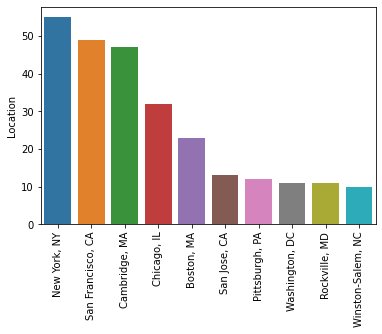

2. Bar plot for Headquarters: total = 10


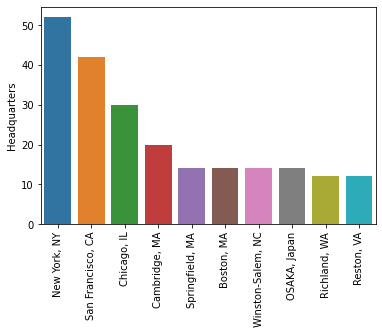

3. Bar plot for company_txt: total = 10


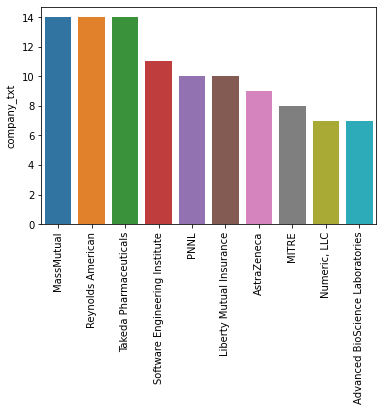

In [47]:
for i, value in enumerate(df_categorical[['Location','Headquarters','company_txt']].columns):
    cat_num = df_categorical[value].value_counts()[:10]
    print(f"{i+1}. Bar plot for {value}: total = {len(cat_num)}")
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

#### Observations:
1.	Top three locations of hiring companies include ‘New York, NY’, ‘San Francisco, CA’, and ‘Cambridge, MA’.
2.	Top three hiring company’s headquarters are in ‘New York, NY’, ‘San Francisco, CA’, and ‘Chicago, IL’.
3.	Top three companies that have highest data scientist job postings include ‘Mass Mutual’, ‘Reynolds American’ and ‘Takeda Pharmaceuticals’.


#### Pivot Tables to dig deep into the data

In [48]:
pd.pivot_table(df, index = 'job_simp', values = 'average_salary')

,average_salary
job_simp,
analyst,66.122549
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,87.967391


#### Observations:
1. The average salary for data scientists is higher than that of other job roles. Data scientists can get an average salary of USD 117.5k per annum, which is significantly higher compared to other roles such as analysts (USD 66k per annum), data engineers (USD 105k per annum), managers (USD 84k per annum), and non-specified roles (USD 88k pre annum).

2. Managers and directors earn higher salaries compared to analysts and data engineers. The average salary for managers is USD 84k per annum, while directors can earn an average salary of USD 168.6k per annum. 

In [49]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'average_salary')

average_salary
job_simp       seniority                
analyst        jr              56.500000
               na              61.155405
               senior          80.092593
data engineer  na              96.701220
               senior         124.689189
data scientist jr             106.500000
               na             107.043011
               senior         138.956522
director       na             168.607143
manager        na              84.022727
mle            na             119.133333
               senior         142.071429
na             na              78.500000
               senior         109.061404

#### Observations:
Director’s hiring is a high-level and demanding hiring, therefore, can draw an average salary of 168k. After director, highest paid job is for senior machine learning engineers (USD 142k per annum), senior data scientist position (USD 139k per annum) and senior data engineer (USD 125k per annum).

In [50]:
pd.pivot_table(df, index = ['job_simp','highest_edu_req'], values = 'average_salary')

average_salary
job_simp       highest_edu_req                
analyst        B.S.                  63.431818
               M.S.                  61.333333
               na                    74.112903
data engineer  B.S.                 106.861702
               M.S.                  98.140625
               Ph.D.                146.714286
               na                   101.606061
data scientist B.S.                 117.685714
               M.S.                 110.182540
               Ph.D.                126.811828
               na                   113.028409
director       M.S.                 127.166667
               Ph.D.                184.000000
               na                   161.500000
manager        B.S.                  65.500000
               M.S.                  79.428571
               na                    99.944444
mle            B.S.                  93.000000
               M.S.                 106.000000
               Ph.D.                134.200000
               na                   160.875000
na             B.S.                  68.542553
               M.S.                  96.616667
               Ph.D.                 99.380952
               na                    74.695652

#### Observations:
1.	As discussed above, the salary of Ph.D. is higher than other two degrees – M.S. and B.S. A data scientist with Ph.D. can make an average salary of USD 127k per annum.
2.	Since I will have a M.S. in Data science and do not have any experience, if I got hired I can earn an average salary of USD 100k per annum but again depends on the location of the company.

In [51]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = ['min_salary', 'average_salary','max_salary']).sort_values('job_state', ascending = False)

average_salary  max_salary  min_salary
job_state job_simp                                              
WI        na                   54.000000   68.000000   40.000000
          data scientist      113.500000  141.000000   86.000000
          analyst              58.833333   75.666667   42.000000
WA        na                   97.500000  130.000000   65.000000
          data scientist       99.764706  122.470588   77.058824
          analyst              54.500000   70.000000   39.000000
VA        na                   79.300000   99.800000   58.800000
          mle                  87.000000  112.000000   62.000000
          data scientist      108.416667  135.500000   81.333333
          data engineer        96.900000  125.600000   68.200000
          analyst              71.583333   92.000000   51.166667
UT        data engineer       100.333333  131.666667   69.000000
          analyst              54.750000   70.500000   39.000000
          data scientist      140.500000  173.000000  108.000000
TX        na                   53.571429   66.285714   40.857143
          data scientist      100.730769  125.230769   76.230769
          data engineer       113.062500  147.000000   79.125000
TN        data scientist       96.000000  122.000000   70.000000
          data engineer       100.950000  130.800000   71.100000
          analyst              27.000000   34.000000   20.000000
SC        na                   60.500000   82.000000   39.000000
RI        analyst             100.000000  126.000000   74.000000
PA        manager             109.666667  139.333333   80.000000
          data engineer        91.500000  120.000000   63.000000
          data scientist      113.333333  142.666667   84.000000
          analyst              62.750000   80.625000   44.875000
          mle                 120.500000  161.428571   79.571429
          na                   81.187500  101.250000   61.125000
OR        data scientist       98.500000  122.333333   74.666667
          data engineer        73.000000   97.000000   49.000000
OH        na                   91.166667  123.000000   59.333333
          data scientist      105.285714  131.571429   79.000000
          analyst              53.875000   70.500000   37.250000
NY        na                   81.583333  109.166667   54.000000
          mle                 125.000000  159.000000   91.000000
          data scientist      115.250000  143.475000   87.025000
          data engineer        86.375000  113.750000   59.000000
          analyst              65.607143   85.071429   46.142857
NM        data scientist       74.333333   93.666667   55.000000
NJ        data scientist      106.875000  132.000000   81.750000
          analyst              83.583333  108.333333   58.833333
          data engineer       112.000000  146.000000   78.000000
          manager             109.500000  134.000000   85.000000
          director            161.500000  199.000000  124.000000
          na                   82.500000  113.000000   52.000000
NE        na                   53.500000   68.250000   38.750000
NC        na                   90.916667  119.750000   62.083333
          data scientist      117.000000  144.666667   89.333333
          data engineer       104.250000  135.666667   72.833333
MO        na                   72.333333  101.333333   43.333333
          manager              40.500000   55.000000   26.000000
          data scientist      127.666667  157.666667   97.666667
          analyst              61.000000   78.000000   44.000000
MN        data engineer        95.000000  125.000000   65.000000
          analyst              76.000000   97.000000   55.000000
MI        manager              87.500000  116.000000   59.000000
          data scientist      106.625000  127.250000   86.000000
MD        na                   88.750000  120.187500   57.312500
          data scientist      109.115385  135.769231   82.461538
          data engineer       109.000000  142.000000   76.000

#### Observations:
1.	The pivot table lists the average salary based on the location of company and job title.
2.	Unless the job is completely remote my focus state is MD.  In MD, the job titles are data scientist, data analysts and data engineers with an average salary of USD 109k, 80k, and 109k per annum, respectively.

In [52]:
data_scientist_state = pd.pivot_table(df[df.job_simp == 'data scientist'], 
                                      index = 'job_state', 
                                      values = 'average_salary').sort_values('average_salary', ascending = False)
data_scientist_state             

,average_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [53]:
# Number of states mentioning 'Data Scientist' positions in their job description
len(data_scientist_state)

27

#### Observations:
A total of 27 company's state locations have listed ‘Data Scientist’ as job title in their description. In MD, a data scientist can earn an average salary of USD 109k.

## Step 3. Model Building

In [54]:
# Lists all dataframe columns
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'average_salary', 'company_txt',
       'job_state', 'company_age', 'python', 'Power_BI', 'Tableau', 'MATLAB',
       'R_studio', 'spark', 'aws', 'excel', 'immigration', 'highest_edu_req',
       'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [55]:
# collect important columns that will in builiding a model
df_model = df[['average_salary','Rating','Type of ownership','Sector',
               'python', 'Power_BI', 'Tableau', 'MATLAB',
               'R_studio', 'spark', 'aws', 'excel', 'immigration', 'highest_edu_req',
               'job_simp', 'seniority', 'num_comp']]
df_model.head(10)

,average_salary,Rating,Type of ownership,Sector,python,Power_BI,Tableau,MATLAB,R_studio,spark,aws,excel,immigration,highest_edu_req,job_simp,seniority,num_comp
0,72.0,3.8,Company - Private,Aerospace & Defense,1,1,1,1,0,0,0,1,1,Ph.D.,data scientist,na,0
1,87.5,3.4,Other Organization,Health Care,1,0,0,0,0,0,0,0,0,M.S.,data scientist,na,0
2,85.0,4.8,Company - Private,Business Services,1,0,0,0,0,1,0,1,0,Ph.D.,data scientist,na,0
3,76.5,3.8,Government,"Oil, Gas, Energy & Utilities",1,0,0,0,0,0,0,0,0,na,data scientist,na,3
4,114.5,2.9,Company - Private,Business Services,1,0,0,0,0,0,0,1,0,na,data scientist,na,3
5,95.0,3.4,Company - Public,Real Estate,1,1,0,0,0,0,1,1,0,na,data scientist,na,3
6,73.5,4.1,Company - Private,Finance,0,0,0,0,0,0,0,1,0,na,data scientist,na,0
7,114.0,3.8,Company - Private,Business Services,1,0,0,0,0,1,1,1,0,Ph.D.,data scientist,na,0
8,61.0,3.3,Hospital,Health Care,0,0,0,0,0,0,0,0,0,Ph.D.,na,na,0
9,140.0,4.6,Company - Private,Information Technology,1,0,0,0,0,1,0,0,0,na,data scientist,na,2


In [56]:
# get dummy data of categorical variables
df_dum = pd.get_dummies(df_model)
df_dum.head()

,average_salary,Rating,python,Power_BI,Tableau,MATLAB,R_studio,spark,aws,excel,immigration,num_comp,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,highest_edu_req_B.S.,highest_edu_req_M.S.,highest_edu_req_Ph.D.,highest_edu_req_na,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,1,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,1,0,0,0,0,0,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [57]:
df_model.shape, df_dum.shape

((742, 17), (742, 62))

#### Observations:
The data frame that I selected to build the model had 17 columns. For modeling, the categorical variables need to be converted to numerical columns by making their dummy variables. After converting to dummy variables, number of columns has been extended from 17 to 62. 

In [58]:
# train test split 
from sklearn.model_selection import train_test_split

In [59]:
# making 'average _salary' as the target variable
X = df_dum.drop('average_salary', axis =1)
y = df_dum.average_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# multiple linear regression 
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     14.20
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           9.73e-82
Time:                        10:40:18   Log-Likelihood:                -3456.6
No. Observations:                 742   AIC:                             7027.
Df Residuals:                     685   BIC:                             7290.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               56.3509      5.671      9.938      0.000      45.217      67.485
Rating                                              -1.6952      1.746     -0.971      0.332      -5.123       1.733
python                                               6.5194      2.577      2.530      0.012       1.459      11.580
Power_BI                                             0.4491      5.349      0.084      0.933     -10.053      10.951
Tableau                                             -1.2432      3.047     -0.408      0.683      -7.227       4.740
MATLAB                                               5.0781      4.157      1.222      0.222      -3.084      13.240
R_studio                                            -7.7849     20.101     -0.387      0.699     -47.252      31.682
spark                                                1.2411      2.964      0.419      0.676      -4.579       7.061
aws                                                  5.2651      2.608      2.019      0.044       0.144      10.386
excel                                                0.1238      2.173      0.057      0.955      -4.143       4.391
immigration                                          0.4904      3.531      0.139      0.890      -6.443       7.423
num_comp                                             1.4290      0.799      1.787      0.074      -0.141       2.999
Type of ownership_-1                                26.0328     25.944      1.003      0.316     -24.907      76.972
Type of ownership_College / University              11.1189     11.838      0.939      0.348     -12.124      34.362
Type of ownership_Company - Private                 12.4128      4.937      2.514      0.012       2.719      22.106
Type of ownership_Company - Public                  13.2969      5.328      2.496      0.013       2.836      23.758
Type of ownership_Government                        -2.8090     12.629     -0.222      0.824     -27.606      21.988
Type of ownership_Hospital                         -13.7703      9.169     -1.502      0.134     -31.773       4.233
Type of ownership_Nonprofit Organization            -3.4846      6.325     -0.551      0.582     -15.903       8.933
Type of ownership_Other Organization                -5.2107     15.256     -0.342      0.733     -35.166      24.744
Type of ownership_School / School District          14.3100     19.659      0.728      0.467     -24.290      52.910
Type of ownership_Subsidiary or Business Segment    20.2531      6.500      3.116      0.002       7.490      33.016
Type of ownership_Unknown                          -15.7991     24.961     -0.633      0.527     -64.809      33.211
Sector_-1                                

#### Observations:
The multiple linear regression shows an R-squared value of 0.537 which is not bad for a model but can be improved. However, this model can show, based on p-value, the variables that can impact the average salary. A p-value of less than 0.05 has significant impact on the average salary. The variables that can impact the average salary includes ‘Python’, ‘AWS’, ‘Type of ownership_Company – Private’, ‘Type of ownership_Company – Public’, ‘Type of ownership_Subsidiary or Business Segment’, ‘Sector_Biotech & Pharmaceuticals’, ‘Sector_Information Technology’, ‘Sector_Media’, ‘highest_edu_req_B.S.’, ‘highest_edu_req_M.S.’, ‘highest_edu_req_Ph.D.’, ‘highest_edu_req_na’, ‘job_simp_analyst’, ‘job_simp_data scientist’, ‘job_simp_director’, ‘job_simp_mle’, ‘job_simp_na’, and ‘seniority_senior’.

In [61]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-1374808546710.2522

#### Observations:
The MAE for linear regression model is quite high. 

#### I worked to find the best alpha values to reduce the MAE and make the model better

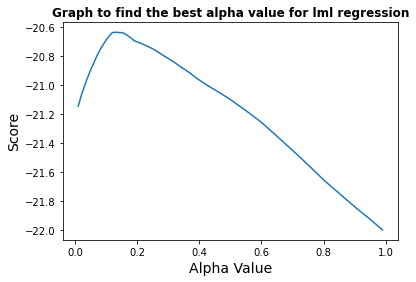

In [62]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)
plt.xlabel('Alpha Value', fontdict={'color':  'black', 'weight': 'normal', 'size':14})
plt.ylabel('Score', fontdict={'color':  'black', 'weight': 'normal', 'size':14})
plt.title('Graph to find the best alpha value for lml regression', 
          fontdict={'color':  'black', 'weight': 'bold', 'size':12})
plt.show()

#### Observations:
The plot shows the alpha values and their score. The peak of the graph is near to 0.2. 

In [63]:
# find the exact alpha value peak
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
12,0.13,-20.637737


In [64]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-20.637737233540147

#### Observation:
Lasso regression has improved the model as the value of MAE is being reduced to -20.6.

In [65]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-15.65397088883965

#### Observation:
It appears that the random forest model reduces MAE further down to -15.7 and therefore this model is better that Lasso regression.

#### Since the MAE are kept reducing, we can find the best model and the parameters by doing the grid search CV method

In [66]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [67]:
gs.best_estimator_, gs.best_score_

(RandomForestRegressor(criterion='mse', max_features='sqrt', n_estimators=200),
 -14.998560513134663)

#### Observations:
The best model here is RandomForestRegressor with its optimized parameters it can resutls in a MAE of -14.99, which is better than the above explored models.

In [68]:
# creating the model
rf_new = RandomForestRegressor(criterion='mse', max_features='sqrt', n_estimators=290)

In [69]:
# fitting the model to the dataset
rf_new.fit(X_train,y_train)
np.mean(cross_val_score(rf_new,X_train,y_train, scoring = 'neg_mean_absolute_error'))

-13.82358758226206

In [70]:
# Make predictions on the test dataset
y_pred = rf_new.predict(X_test)

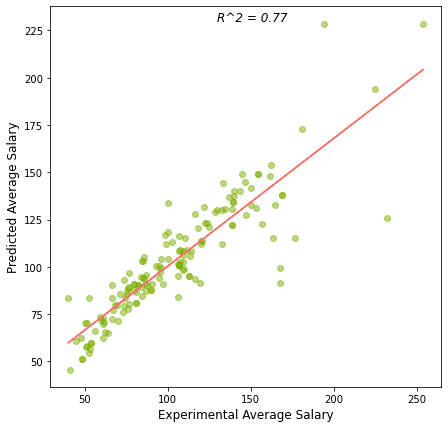

In [71]:
from sklearn.metrics import r2_score
plt.figure(figsize=(7,7))
plt.scatter(x=y_test, y=y_pred, c="#7CAE00", alpha=0.5)
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")
plt.ylabel('Predicted Average Salary', fontdict={'color':  'black', 'weight': 'normal', 'size':12})
plt.xlabel('Experimental Average Salary', fontdict={'color':  'black', 'weight': 'normal', 'size':12})
plt.text(130, 230, f'R^2 = {round(r2_score(y_test, y_pred),3)}', style='italic', 
         fontdict={'color':  'black', 'weight': 'normal', 'size':12})
plt.show()

#### Observations:
The predicted values and the actual values show a wonderful power of prediction of 0.77. 

#### Now I wished to predict my future salary based on the trained model and my given parameters

In [72]:
X_test.columns

Index(['Rating', 'python', 'Power_BI', 'Tableau', 'MATLAB', 'R_studio',
       'spark', 'aws', 'excel', 'immigration', 'num_comp',
       'Type of ownership_-1', 'Type of ownership_College / University',
       'Type of ownership_Company - Private',
       'Type of ownership_Company - Public', 'Type of ownership_Government',
       'Type of ownership_Hospital',
       'Type of ownership_Nonprofit Organization',
       'Type of ownership_Other Organization',
       'Type of ownership_School / School District',
       'Type of ownership_Subsidiary or Business Segment',
       'Type of ownership_Unknown', 'Sector_-1', 'Sector_Accounting & Legal',
       'Sector_Aerospace & Defense', 'Sector_Agriculture & Forestry',
       'Sector_Arts, Entertainment & Recreation',
       'Sector_Biotech & Pharmaceuticals', 'Sector_Business Services',
       'Sector_Construction, Repair & Maintenance', 'Sector_Consumer Services',
       'Sector_Education', 'Sector_Finance', 'Sector_Government',
       'Sec

#### I am interested in predicting an average salary for myself if hired as a data scientist position in a medium rated private company in Biotech & Pharma sector or Insurance sector.

In [73]:
# Adding the parameters to the dataset
varsha_data = {'Rating': [3,3], 'python': [1,1], 'Power_BI': [1,1], 'Tableau': [1,1], 
               'MATLAB': [0,0], 'R_studio': [1,1], 'spark': [0,0], 'aws': [0,0], 'excel': [1,1], 
               'immigration': [0,0], 'num_comp':[0,0],
       'Type of ownership_-1': [0,0], 'Type of ownership_College / University': [0,0],
       'Type of ownership_Company - Private': [1,1],
       'Type of ownership_Company - Public': [0,0], 'Type of ownership_Government':[0,0],
       'Type of ownership_Hospital': [0,1],
       'Type of ownership_Nonprofit Organization':[0,0],
       'Type of ownership_Other Organization':[0,0],
       'Type of ownership_School / School District':[0,0],
       'Type of ownership_Subsidiary or Business Segment':[0,0],
       'Type of ownership_Unknown':[0,0], 'Sector_-1':[0,0], 'Sector_Accounting & Legal':[0,0],
       'Sector_Aerospace & Defense':[0,0], 'Sector_Agriculture & Forestry':[0,0],
       'Sector_Arts, Entertainment & Recreation':[0,0],
       'Sector_Biotech & Pharmaceuticals':[1,0], 'Sector_Business Services':[0,0],
       'Sector_Construction, Repair & Maintenance':[0,0], 'Sector_Consumer Services':[0,0],
       'Sector_Education':[0,0], 'Sector_Finance':[0,0], 'Sector_Government':[0,0],
       'Sector_Health Care':[0,0], 'Sector_Information Technology':[0,0],
       'Sector_Insurance':[0,1], 'Sector_Manufacturing':[0,0], 'Sector_Media':[0,0],
       'Sector_Mining & Metals':[0,0], 'Sector_Non-Profit':[0,0],
       'Sector_Oil, Gas, Energy & Utilities':[0,0], 'Sector_Real Estate':[0,0],
       'Sector_Retail':[0,0], 'Sector_Telecommunications':[0,0],
       'Sector_Transportation & Logistics':[0,0], 'Sector_Travel & Tourism':[0,0],
       'highest_edu_req_B.S.':[0,0], 'highest_edu_req_M.S.':[1,1], 'highest_edu_req_Ph.D.':[0,0],
       'highest_edu_req_na':[0,0], 'job_simp_analyst':[1,1], 'job_simp_data engineer':[0,0],
       'job_simp_data scientist':[1,1], 'job_simp_director':[0,0], 'job_simp_manager':[0,0],
       'job_simp_mle':[0,0], 'job_simp_na':[0,0], 'seniority_jr':[1,1], 'seniority_na':[0,0],
       'seniority_senior':[0,0]}

In [74]:
# Convert the dataset to the dataframe
df_varsha = pd.DataFrame.from_dict(varsha_data)
df_varsha.head()

,Rating,python,Power_BI,Tableau,MATLAB,R_studio,spark,aws,excel,immigration,num_comp,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,highest_edu_req_B.S.,highest_edu_req_M.S.,highest_edu_req_Ph.D.,highest_edu_req_na,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,3,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
1,3,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0


In [75]:
# Make predictions for Varsha's salary
varsha_salary_pred = rf_new.predict(df_varsha)
varsha_salary_pred

array([93.55034483, 90.81436782])

#### Observations:
According to the model, I can be hired as a junior data scientist in Biotech & pharma company for a salary of around USD 93.5k per annum or in an insurance company for around USD 90.8k per annum.